<a href="https://colab.research.google.com/github/ingrafaeln/Ciencia-de-Datos/blob/main/Seccion_2/Ejemplo_3_mall_customers_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudio comparativo de algoritmos de clustering para la segmentación de clientes de un centro comercial

## Introducción

En este notebook, se realizará un estudio comparativo de algunos algoritmos de clustering para la segmentación de clientes de un centro comercial. El objetivo es encontrar el algoritmo que mejor segmente a los clientes de acuerdo a sus características.

**Los pasos a seguir para el desarrollo del notebook son los siguientes:**

1. Comprensión del problema
2. Análisis exploratorio de datos
3. Preprocesamiento de datos
4. Modelado
5. Evaluación de modelos
6. Conclusiones

**Los modelos a comparar son:**
- K-Means
- DBSCAN

## 1. Comprensión del problema

La primera etapa de cualquier proyecto de Machine Learning es comprender el problema que se quiere resolver. El objetivo es encontrar el algoritmo que mejor segmente a los clientes de acuerdo a sus características. Para ello, se utilizará el dataset [Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) de Kaggle.

Características del dataset:
- **CustomerID:** Identificador único del cliente
- **Gender:** Género del cliente
- **Age:** Edad del cliente
- **Annual Income (k$):** Ingresos anuales del cliente
- **Spending Score (1-100):** Puntuación asignada por el centro comercial en función del comportamiento del cliente y la naturaleza del gasto

De acuerdo a las características del dataset, se puede observar que se trata de un problema de clustering. El objetivo es encontrar grupos de clientes que compartan características similares. Por lo tanto, se utilizarán algoritmos de aprendizaje no supervisado para resolver el problema.

## 2. Análisis exploratorio de datos

En esta fase, se procede a realizar un análisis exploratorio de los datos para obtener una visión más profunda de la información disponible. Este paso es crucial para identificar patrones, tendencias y características que puedan afectar el rendimiento de los modelos de Machine Learning.

### Pasos Clave:

* **Carga de Datos**

Se cargarán los datos en un DataFrame de Pandas para su posterior análisis. Se utilizará la función `head()` para visualizar las primeras filas del conjunto de datos.

* **Información del Dataset**

Se utilizará la función `info()` para obtener información sobre el conjunto de datos, como el número de filas y columnas, el tipo de datos de cada variable y la cantidad de valores no nulos.

* **Estadísticas Descriptivas**

Se calcularán estadísticas descriptivas para cada variable, como medias, medianas, desviaciones estándar y cuartiles. Esto proporcionará una comprensión inicial de la distribución y la dispersión de los datos.

* **Visualización de Datos**

Se utilizarán gráficos y visualizaciones para representar las relaciones entre diferentes variables. Histogramas, diagramas de dispersión y boxplots ayudarán a identificar posibles correlaciones y outliers en el conjunto de datos.


* **Correlación entre Variables**
  
Se analizará la correlación entre las variables para comprender las relaciones lineales potenciales. Esto es crucial para seleccionar las características más relevantes en fases posteriores.


**Resultados Esperados:**

- **Identificación de Tendencias:** Descubrimiento de patrones o tendencias notables en los datos.
- **Detección de Outliers:** Identificación de posibles valores atípicos que puedan afectar la precisión del modelo.
- **Entendimiento de Correlaciones:** Comprensión de las relaciones entre las variables y su relevancia para la predicción.
- **Selección de Características:** Identificación de las variables más influyentes para la predicción.

Este análisis exploratorio establecerá una base sólida para la siguiente fase, donde se realizará la preparación de los datos antes de la construcción y evaluación de modelos de Clustering.

### 2.1 Carga de Datos

En esta sección, se cargarán los datos en un DataFrame de Pandas para su posterior análisis. Se utilizará la función `head()` para visualizar las primeras filas del conjunto de datos.

In [1]:
# verificar si estamos en google colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [2]:


if IN_COLAB:
    print("Descargando y preparando los datos para Colab...")
    # Descargamos el repositorio completo como un archivo zip
    !wget -O datasets.zip https://github.com/ingrafaeln/Ciencia-de-Datos/archive/refs/heads/main.zip
    # Descomprimimos el archivo
    !unzip -q datasets.zip
    # Movemos la carpeta de datasets a una ubicación principal
    !mv Ciencia-de-Datos-main/datasets ./datasets_github
    # Limpiamos los archivos descargados que ya no son necesarios
    !rm -rf datasets.zip Ciencia-de-Datos-main
    print("Datos listos.")



Descargando y preparando los datos para Colab...
--2025-10-08 23:22:21--  https://github.com/ingrafaeln/Ciencia-de-Datos/archive/refs/heads/main.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/ingrafaeln/Ciencia-de-Datos/zip/refs/heads/main [following]
--2025-10-08 23:22:21--  https://codeload.github.com/ingrafaeln/Ciencia-de-Datos/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘datasets.zip’

datasets.zip            [  <=>               ]   4.93M  12.3MB/s    in 0.4s    

2025-10-08 23:22:22 (12.3 MB/s) - ‘datasets.zip’ saved [5173989]

mv: cannot move 'Ciencia-de-Datos-main/datasets' to './datasets

In [3]:
import os
# Obtener el directorio raíz del proyecto
dir_root = os.path.dirname(os.getcwd())

In [4]:
#--------------------------------------------------------------------------------
# PASO 1: CARGA DE LIBRERÍAS Y DATOS
#--------------------------------------------------------------------------------

# Importamos la biblioteca pandas, que es la herramienta estándar en Python para
# la manipulación y el análisis de datos. La abreviamos como 'pd' por convención.
import pandas as pd

# Definimos el nombre de la carpeta que contiene nuestro dataset.
# Esta línea utiliza una condición para hacer el código portable:
# - Si la variable 'IN_COLAB' es True (estamos en Google Colab), usa la ruta 'content/datasets_github'.
# - De lo contrario (estamos en un entorno local), usa la ruta 'datasets'.
datasets_folder_name = 'content/datasets_github' if IN_COLAB else 'datasets'

# Construimos la ruta completa hacia el archivo CSV usando 'os.path.join'.
# Esta función es ideal porque crea una ruta válida para cualquier sistema operativo.
# La ruta final se compone del directorio raíz, la carpeta de datasets, la subcarpeta
# 'clustering' (indicando el nuevo tipo de problema) y el nombre del archivo 'Mall_Customers.csv'.
ruta_dataset = os.path.join(dir_root, datasets_folder_name, 'clustering', 'Mall_Customers.csv')

# Usamos la función 'read_csv' de pandas para leer el archivo desde la ruta que construimos.
# El contenido del archivo se carga en una estructura de tabla llamada DataFrame,
# que guardamos en la variable 'data'.
data = pd.read_csv(ruta_dataset)

# Utilizamos el método '.head()' del DataFrame para mostrar una vista previa de los datos.
# Por defecto, nos enseña las primeras 5 filas de la tabla. Este es un paso
# fundamental para verificar que la carga fue exitosa y para tener una primera
# idea de la estructura de nuestros nuevos datos de clientes.
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploración de Datos

En esta sección, se procede a realizar un análisis exploratorio de los datos para obtener una visión más profunda de la información disponible.

### 2.2 Información del Dataset

Se utilizará la función `info()` para obtener información sobre el conjunto de datos, como el número de filas y columnas, el tipo de datos de cada variable y la cantidad de valores no nulos.

In [5]:
#--------------------------------------------------------------------------------
# PASO 2: OBTENER UN RESUMEN TÉCNICO DEL DATAFRAME
#--------------------------------------------------------------------------------

# Usamos el método '.info()' sobre nuestro DataFrame 'data'.
# Este método imprime un resumen completo de la estructura del DataFrame,
# lo que es crucial para la fase inicial de exploración de datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Adicionalmente, es posible obtener información sobre el número de valores null en cada columna utilizando la función `isnull()`.

In [6]:
#--------------------------------------------------------------------------------
# PASO 3: VERIFICACIÓN CUANTITATIVA DE VALORES NULOS
#--------------------------------------------------------------------------------

# Este comando nos da un recuento preciso de los valores nulos por columna,
# confirmando lo que vimos en el resumen de .info().
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


**Conclusiones:**

- El conjunto de datos contiene 200 filas y 5 columnas.
- No hay valores nulos en el conjunto de datos.
- La variable `Gender` es de tipo categórico.
- Las variables `Age`, `Annual Income (k$)` y `Spending Score (1-100)` son de tipo numérico.
- La variable `CustomerID` es de tipo numérico que representa un identificador único para cada cliente. Sin embargo, no es relevante para el análisis, por lo que se eliminará en la siguiente sección.


In [7]:
#--------------------------------------------------------------------------------
# PASO 4: ELIMINACIÓN DE COLUMNAS IRRELEVANTES
#--------------------------------------------------------------------------------

# Usamos el método .drop() para eliminar la columna 'CustomerID'.
# La operación se realiza 'inplace', lo que significa que el DataFrame 'data'
# se modifica directamente y de forma permanente.
data.drop(['CustomerID'], axis=1, inplace=True)

### 2.3 Estadísticas Descriptivas

Se calcularán estadísticas descriptivas para cada variable, como medias, medianas, desviaciones estándar y cuartiles. Esto proporcionará una comprensión inicial de la distribución y la dispersión de los datos.

**Conclusiones:**
- La edad media de los clientes es de 38 años, con una desviación estándar de 14 años.
- Los ingresos anuales medios de los clientes son de 60.56 k$, con una desviación estándar de 26.26 k$.
- La puntuación de gasto media de los clientes es de 50.2, con una desviación estándar de 25.82.
- La mayoría de los clientes tienen entre 28 y 49 años.
- La mayoría de los clientes tienen ingresos anuales entre 41 y 78 k$.
- La mayoría de los clientes tienen una puntuación de gasto entre 35 y 73.


### 2.4 Visualización de Datos

Se utilizarán gráficos y visualizaciones para representar las relaciones entre diferentes variables. Histogramas, diagramas de dispersión y boxplots ayudarán a identificar posibles correlaciones y outliers en el conjunto de datos.

- **Histogramas:** Se utilizarán histogramas para visualizar la distribución de las variables numéricas. Esto ayudará a identificar posibles outliers y a comprender la distribución de los datos.
- **Diagramas de Dispersión:** Se utilizarán diagramas de dispersión para visualizar la relación entre dos variables numéricas. Esto ayudará a identificar posibles correlaciones entre las variables.
- **Boxplots:** Se utilizarán boxplots para visualizar la distribución de las variables numéricas. Esto ayudará a identificar posibles outliers y a comprender la distribución de los datos.
- **Gráficos de Barras:** Se utilizarán gráficos de barras para visualizar la distribución de las variables categóricas. Esto ayudará a comprender la distribución de los datos.

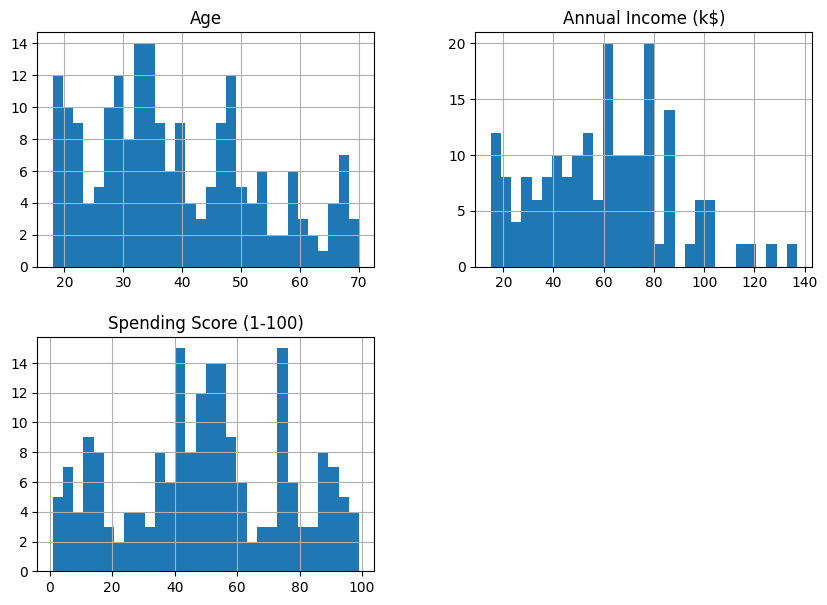

In [8]:
#--------------------------------------------------------------------------------
# PASO 5: VISUALIZACIÓN DE LA DISTRIBUCIÓN DE LAS VARIABLES
#--------------------------------------------------------------------------------

# Importamos la biblioteca de visualización de datos Matplotlib.
# 'pyplot' es su módulo más común y lo abreviamos como 'plt'.
import matplotlib.pyplot as plt

# Usamos el método .hist() directamente sobre nuestro DataFrame 'data'.
# Este método encontrará todas las columnas con datos numéricos y creará un
# histograma para cada una de ellas.
# - bins=30: Especifica que el rango de cada variable se dividirá en 30
#            intervalos o "barras". Esto nos da un buen nivel de detalle
#            para ver la forma de la distribución.
# - figsize=(10,7): Define el tamaño total de la figura que contendrá
#                   todos los gráficos (10 pulgadas de ancho por 7 de alto).
data.hist(bins=30, figsize=(10,7))

# Este comando de Matplotlib muestra la figura que hemos generado.
plt.show()

**Conclusiones de los Histogramas:**

- La mayoría de los clientes tienen entre 28 y 49 años.
- La mayoría de los clientes tienen ingresos anuales entre 41 y 78 k$.
- La mayoría de los clientes tienen una puntuación de gasto entre 35 y 73.

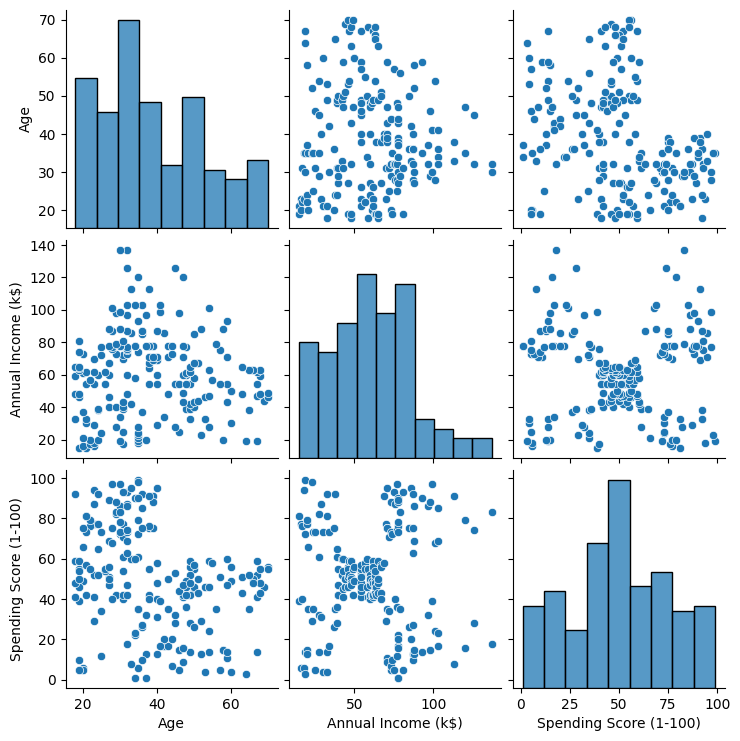

In [9]:
#--------------------------------------------------------------------------------
# PASO 6: VISUALIZACIÓN DE RELACIONES BIVARIADAS
#--------------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt # Necesario para plt.show()

# Asumiendo que 'data' es tu DataFrame
# La función `pairplot` de Seaborn crea una cuadrícula de ejes tal que cada
# variable numérica en el DataFrame se comparte a través de las filas (eje y)
# y las columnas (eje x). Por defecto, ignora las columnas no numéricas.
sns.pairplot(data)

# Mostramos la compleja figura que se ha generado.
plt.show()

**Conclusiones de los Diagramas de Dispersión:**
Con base en los diagramas de dispersión, no se observa una correlación clara entre las variables numéricas.

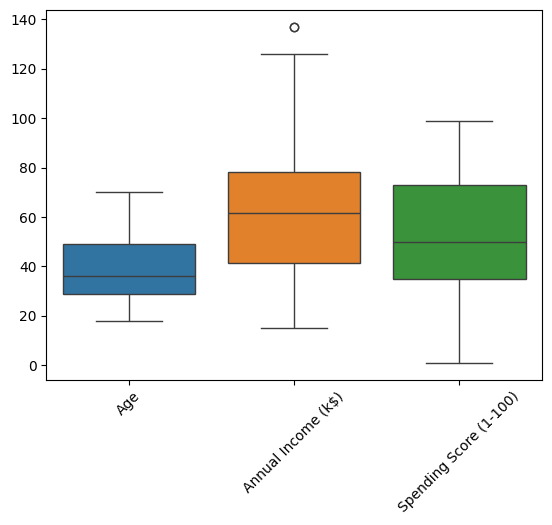

In [10]:
#--------------------------------------------------------------------------------
# PASO 7: COMPARACIÓN DE LA ESCALA DE LAS VARIABLES NUMÉRICAS
#--------------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt # Necesario para plt.show() y xticks

# Usamos `sns.boxplot` pasándole el DataFrame completo. Seaborn es lo
# suficientemente inteligente como para encontrar todas las columnas numéricas
# y crear un diagrama de caja para cada una, mostrándolos en el mismo gráfico.
sns.boxplot(data=data)

# Esta es una función de Matplotlib para mejorar la legibilidad.
# Gira las etiquetas del eje X (que serán los nombres de nuestras columnas)
# en un ángulo de 45 grados para evitar que se superpongan si son largas.
plt.xticks(rotation=45)

# Mostramos el gráfico.
plt.show()

**Conclusiones de los Boxplots:**
- La distribución de la variable `Age` es aproximadamente simétrica, con una mediana de 36 años.
- La distribución de la variable `Annual Income (k$)` es aproximadamente simétrica, con una mediana de 61 k$.
- La distribución de la variable `Spending Score (1-100)` es aproximadamente simétrica, con una mediana de 50.
- No se observan outliers en ninguna de las variables numéricas.

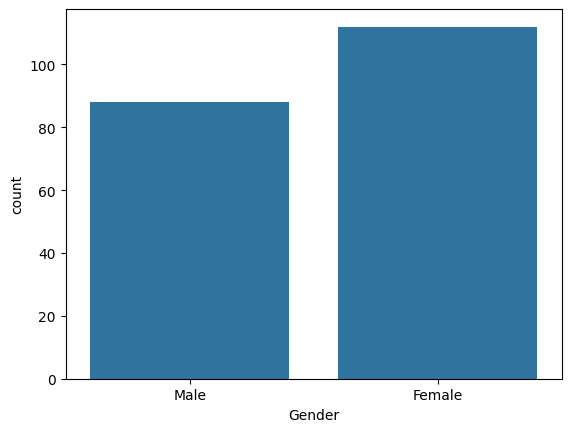

In [11]:
#--------------------------------------------------------------------------------
# PASO 8: ANÁLISIS DE VARIABLES CATEGÓRICAS
#--------------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt # Necesario para plt.show()

# Usamos `sns.countplot` para contar las ocurrencias de cada categoría en una columna.
# - x='Gender': Le decimos a Seaborn que cree una barra para cada categoría
#              única que encuentre en la columna 'Gender'.
# - data=data: Especificamos que los datos provienen de nuestro DataFrame 'data'.
sns.countplot(x='Gender', data=data)

# Mostramos el gráfico.
plt.show()

La distribución de la variable `Gender` es uniforme, con 112 clientes de género masculino y 88 clientes de género femenino. Por lo tanto, no se observa un desbalanceo significativo en la variable categórica.

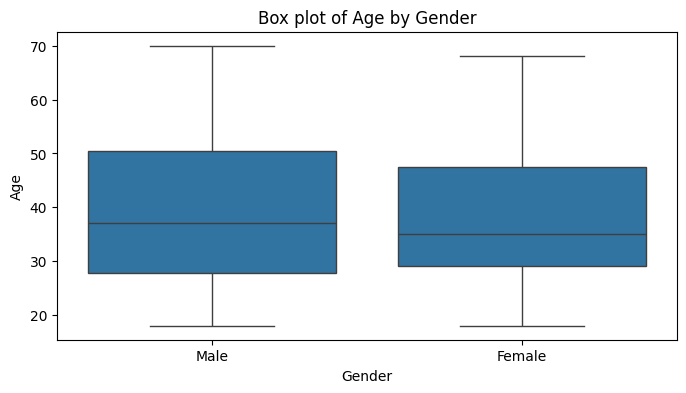

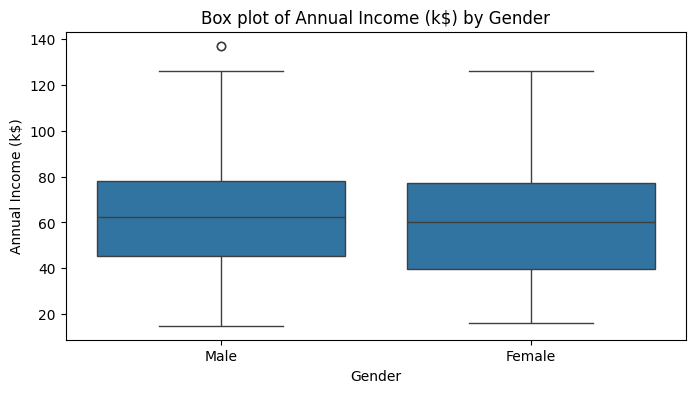

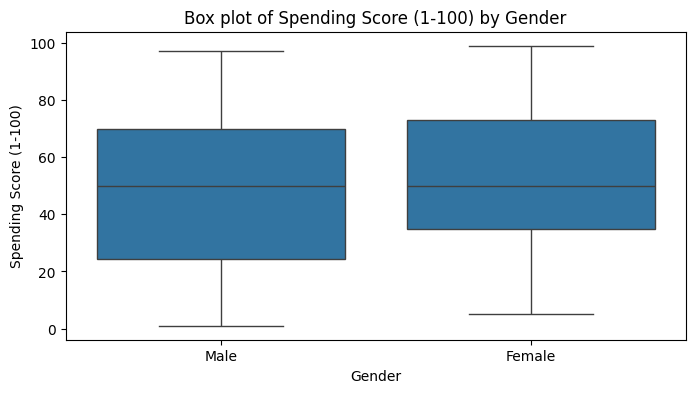

In [12]:
#--------------------------------------------------------------------------------
# PASO 9: ANÁLISIS BIVARIADO (NUMÉRICO VS. CATEGÓRICO)
#--------------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. IDENTIFICACIÓN AUTOMÁTICA DE TIPOS DE VARIABLES ---

# Esta es una forma elegante de no tener que escribir los nombres de las columnas a mano.
# data.select_dtypes(include='object') filtra el DataFrame para quedarse solo con las columnas de tipo 'object' (texto).
# .columns.tolist() convierte los nombres de esas columnas en una lista.
categorical_vars = data.select_dtypes(include='object').columns.tolist()

# Hacemos lo mismo para las variables numéricas (enteros y decimales).
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()


# --- 2. BUCLE PARA CREAR GRÁFICOS ---

# Iniciamos un bucle que se repetirá una vez para cada nombre de variable en nuestra lista 'numerical_vars'.
for var in numerical_vars:
    # Para cada variable, primero creamos una nueva figura para que los gráficos no se superpongan.
    plt.figure(figsize=(8, 4))

    # Creamos un boxplot.
    # - x='Gender': Le decimos que en el eje X ponga las categorías de 'Gender' (Male, Female).
    # - y=var: Le decimos que en el eje Y represente los valores de la variable numérica actual del bucle
    #          (la primera vez será 'Age', la segunda 'Annual Income (k$)', etc.).
    # - data=data: Le indicamos que use nuestro DataFrame.
    sns.boxplot(x='Gender', y=var, data=data)

    # Creamos un título dinámico que cambia en cada iteración del bucle.
    plt.title('Box plot of ' + var + ' by Gender')

    # Mostramos el gráfico de la iteración actual antes de pasar a la siguiente.
    plt.show()

**Conclusiones de los Gráficos de Boxplots:**

Al comparar las distribuciones de las variables numéricas por género, se observa que:

- Los clientes de género femenino tienden a ser más jóvenes que los clientes de género masculino.
- Los clientes de género femenino tienden a tener ingresos anuales más bajos que los clientes de género masculino.
- Los clientes de género femenino tienden a tener una puntuación de gasto más alta que los clientes de género masculino.

### 2.5 Correlación entre Variables

Se analizará la correlación entre las variables para comprender las relaciones lineales potenciales. Esto es crucial para seleccionar las características más relevantes en fases posteriores.

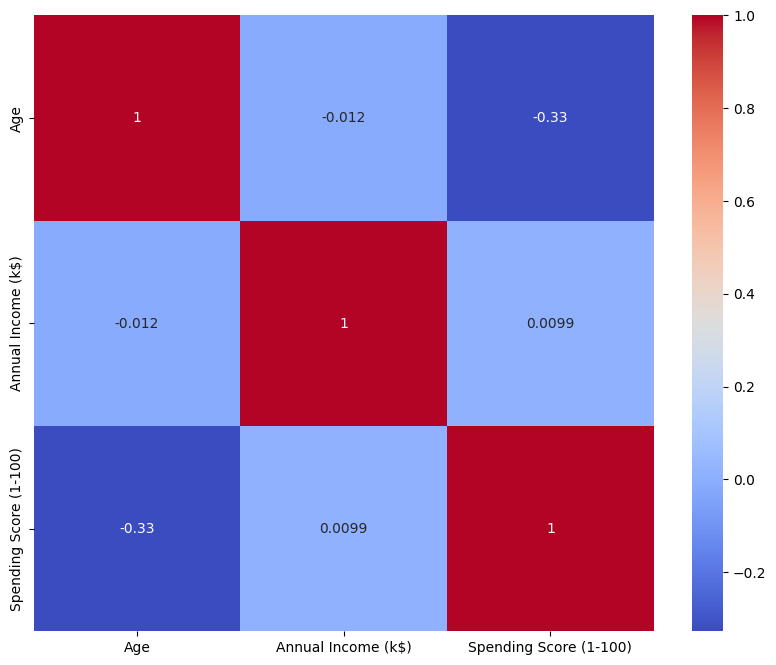

In [13]:
#--------------------------------------------------------------------------------
# PASO 10: ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS
#--------------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. CÁLCULO DE LA MATRIZ DE CORRELACIÓN ---

# Primero, seleccionamos solo las columnas de tipo numérico para evitar errores.
# Luego, usamos el método .corr() para calcular el coeficiente de correlación de Pearson
# entre cada par de columnas numéricas. El resultado se guarda en la variable 'correlation'.
correlation = data.select_dtypes(include=['int64', 'float64']).corr()

# --- 2. VISUALIZACIÓN CON UN MAPA DE CALOR ---

# Creamos una figura de Matplotlib con un tamaño adecuado para que sea fácil de leer.
plt.figure(figsize=(10, 8))

# Usamos la función heatmap de Seaborn para crear la visualización.
# - correlation: Es la matriz de datos que queremos graficar.
# - annot=True: Esencial. Muestra el valor numérico de la correlación en cada celda.
# - cmap='coolwarm': Usamos una paleta de colores "divergente". Los valores positivos
#                    serán de color cálido (rojo), los negativos de color frío (azul),
#                    y los cercanos a cero serán de color neutro.
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Mostramos el gráfico.
plt.show()

**Conclusiones de la Correlación:**

- No se observa una correlación clara entre las variables numéricas.

### 2.6 Conclusiones de la Exploración de Datos

- El conjunto de datos contiene 200 filas y 5 columnas.
- No hay valores nulos en el conjunto de datos.
- La variable `Gender` es de tipo categórico. Podría pensarse que se podría convertir a binario, pero no tiene sentido ya que dentro de los algoritmos de clustering no es recomendable utilizar variables categóricas. [Ver más](https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided)
- Dada la naturaleza de los algorithmos de clustering, no es necesario normalizar los datos, ya que estos algoritmos no se ven afectados por la escala de los datos.

## 3. Preprocesamiento de Datos

En esta sección, se realizará el preprocesamiento de los datos para prepararlos para la construcción de modelos de Clustering.

De acuerdo a los resultados del análisis exploratorio de datos, se eliminará la variable `CustomerID` ya que no es relevante para el análisis. Adicionalmente, se eliminará la variable `Gender` ya que los algoritmos de clustering no son afectados por variables categóricas.

De esta forma, el conjunto de datos final contiene 200 filas y 3 columnas. Las cuales son las variables `Age`, `Annual Income (k$)` y `Spending Score (1-100)`.

- Se buscará la cantidad óptima de clusters utilizando el método del codo, para así poder definir el valor de `k` para el algoritmo K-Means.

In [14]:
#--------------------------------------------------------------------------------
# PASO 11: PREPARACIÓN DE DATOS PARA EL MODELADO
#--------------------------------------------------------------------------------

# El comentario "# Datos de entrenamiento" indica que estamos preparando el set de datos (X)
# para un algoritmo. En clustering, a menudo se usa todo el dataset para encontrar los grupos.

# Usamos el método .select_dtypes() para filtrar las columnas del DataFrame 'data'
# basándonos en su tipo de dato.
# - include=['int64', 'float64']: Le decimos que incluya todas las columnas que
#   sean de tipo entero (int64) o de tipo decimal (float64).
# El resultado es un nuevo DataFrame que contiene solo las columnas numéricas,
# el cual guardamos en una nueva variable `X_data`. La columna 'Gender' es excluida.
X_data = data.select_dtypes(include=['int64', 'float64'])

# Mostramos las primeras 5 filas del nuevo DataFrame `X_data`.
# Esto sirve como una rápida verificación visual para confirmar que la selección
# se realizó correctamente y que solo tenemos las columnas numéricas deseadas.
X_data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### 3.1 Apliación del método del codo

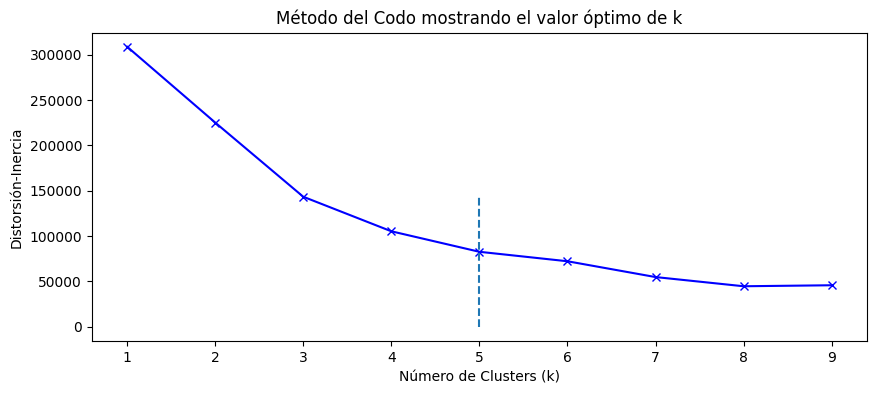

In [15]:
#--------------------------------------------------------------------------------
# PASO 12: DETERMINACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS (MÉTODO DEL CODO)
#--------------------------------------------------------------------------------

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Asumiendo que 'X_data' es tu DataFrame con datos numéricos (y escalados, idealmente)

# --- 1. CONFIGURACIÓN DEL EXPERIMENTO ---

# Inicializamos una lista vacía para almacenar los valores de inercia de cada prueba.
distortions = []
# Definimos el rango de valores de 'k' que vamos a probar. En este caso, de 1 a 9 clusters.
K = range(1,10)

# --- 2. BUCLE PARA PROBAR CADA VALOR DE 'k' ---

# Iteramos a través de cada número en nuestro rango K.
for k in K:
    # Creamos una instancia del modelo KMeans, especificando el número de clusters 'k' para esta iteración.
    # Nota de buena práctica: para resultados reproducibles, es mejor usar:
    # kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeanModel = KMeans(n_clusters=k)
    # Entrenamos el modelo con nuestros datos. El algoritmo encontrará los 'k' centroides.
    kmeanModel.fit(X_data)
    # Obtenemos el valor de la Inercia del modelo entrenado y lo añadimos a nuestra lista.
    # Inercia: Es la suma de las distancias al cuadrado de cada punto de datos a su centroide más cercano.
    # En resumen, mide qué tan compactos son los clusters. Menor inercia = clusters más densos.
    distortions.append(kmeanModel.inertia_)

# --- 3. VISUALIZACIÓN DE LOS RESULTADOS ---

# Creamos la figura para nuestro gráfico.
plt.figure(figsize=(10,4))
# Graficamos los valores de 'k' (eje X) contra sus valores de 'Inercia' (eje Y).
# 'bx-' significa: 'b' color azul, 'x' marcador en cada punto, '-' línea continua.
plt.plot(K, distortions, 'bx-')
# Esta línea es un añadido manual para señalar visualmente dónde se espera el codo (en k=5).
plt.vlines(x=K[4], ymin=0, ymax=distortions[2], linestyles='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Distorsión-Inercia')
plt.title('Método del Codo mostrando el valor óptimo de k')
plt.show()

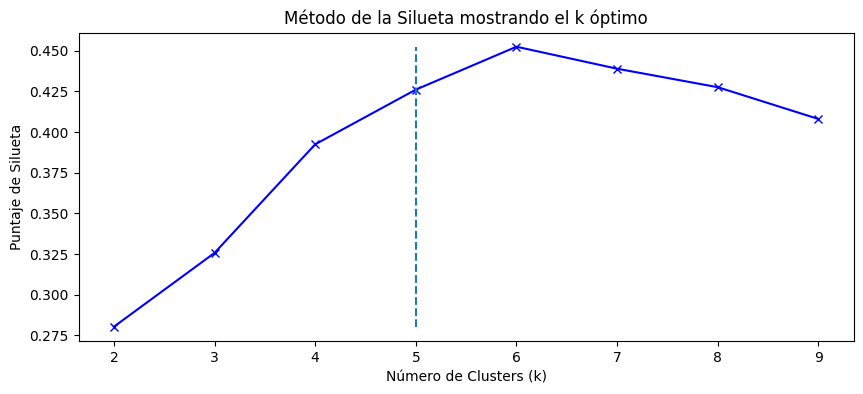

In [16]:
#--------------------------------------------------------------------------------
# PASO 13: VALIDACIÓN DEL NÚMERO DE CLUSTERS (MÉTODO DE LA SILUETA)
#--------------------------------------------------------------------------------

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# --- 1. CONFIGURACIÓN DEL EXPERIMENTO ---

# Inicializamos una lista vacía para almacenar los puntajes de silueta.
silhouette_scores = []
# Definimos el rango de 'k'. Se empieza en 2 porque el puntaje de silueta
# requiere al menos 2 clusters para poder medir la separación.
K = range(2,10)

# --- 2. BUCLE PARA PROBAR CADA VALOR DE 'k' ---

for k in K:
    # Creamos y entrenamos el modelo K-Means para el valor actual de 'k'.
    # (Nuevamente, se recomienda usar init='k-means++' y random_state para reproducibilidad)
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_data)
    # Calculamos el puntaje de silueta. Necesita los datos y las etiquetas que
    # el modelo acaba de asignar a cada punto (kmeanModel.labels_).
    # El resultado es el puntaje de silueta promedio para todos los puntos.
    silhouette_scores.append(silhouette_score(X_data, kmeanModel.labels_))

# --- 3. VISUALIZACIÓN DE LOS RESULTADOS ---

plt.figure(figsize=(10,4))
# Graficamos 'k' (eje X) contra el 'Puntaje de Silueta' (eje Y).
plt.plot(K, silhouette_scores, 'bx-')
# Añadimos una línea vertical para resaltar el k óptimo (k=5).
plt.vlines(x=K[3], ymin=silhouette_scores[0], ymax=silhouette_scores[4], linestyles='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntaje de Silueta')
plt.title('Método de la Silueta mostrando el k óptimo')
plt.show()

**Conclusiones del método del codo:**

Se aplicaron dos métodos para encontrar el número óptimo de clusters. El método del codo y el método de la silueta. Ambos métodos sugieren que el número óptimo de clusters es 5.

- En el método del codo, se observa que la inercia disminuye significativamente hasta 5 clusters, y luego disminuye de forma más gradual. Por lo tanto, se seleccionará 5 como el número óptimo de clusters. Se podría considerar tambien 6 clusters, pero se seleccionará 5 para evitar clusters muy pequeños.

- En el método del puntaje de silueta en función del número de clusters, se observa los puntajes mas altos cuando el número de clusters es 5 y 6. Sin embargo, se seleccionará 5 como el número óptimo de clusters.

## 4. Modelado

En esta sección, se construirán y entrenarán los modelos de Clustering.

Se utilizarán los siguientes algoritmos:

- K-Means
- DBSCAN

### 4.1 K-Means

In [17]:
#--------------------------------------------------------------------------------
# PASO 14: ENTRENAMIENTO DEL MODELO K-MEANS FINAL Y ASIGNACIÓN DE CLUSTERS
#--------------------------------------------------------------------------------

from sklearn.cluster import KMeans

# --- 1. CREACIÓN Y ENTRENAMIENTO DEL MODELO FINAL ---

# Creamos la instancia final de nuestro modelo K-Means, especificando el número
# óptimo de clusters que encontramos: n_clusters=5.
# Para asegurar que los resultados sean siempre los mismos cada vez que ejecutemos
# el código, es una muy buena práctica añadir 'init' y 'random_state'.
# kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans = KMeans(n_clusters=5)

# Entrenamos el modelo con nuestros datos numéricos. El algoritmo ahora agrupa
# a los 200 clientes en los 5 clusters más coherentes posibles.
kmeans.fit(X_data)

# --- 2. EXTRACCIÓN DE LAS ETIQUETAS DE CLUSTER ---

# Una vez entrenado el modelo, podemos acceder al atributo '.labels_', que es un
# array donde cada elemento es el número del cluster (de 0 a 4) al que ha sido
# asignado el cliente correspondiente.
kmeans_labels = kmeans.labels_

# --- 3. INTEGRACIÓN DE LOS RESULTADOS EN UN NUEVO DATAFRAME ---

# Es una buena práctica crear una copia de nuestros datos para no modificar el original.
KM5_Clust = X_data.copy()

# Creamos una nueva columna en nuestra copia llamada 'Cluster'.
# A esta columna le asignamos las etiquetas que generó el modelo.
# Ahora, cada fila (cliente) tiene su segmento de mercado asignado.
KM5_Clust['Cluster'] = kmeans_labels

# Mostramos las primeras 5 filas del nuevo DataFrame para verificar el resultado.
# Verás las características originales junto con la nueva columna 'Cluster'.
KM5_Clust.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,1
1,21,15,81,4
2,20,16,6,1
3,23,16,77,4
4,31,17,40,1


In [18]:
#--------------------------------------------------------------------------------
# PASO 15: VERIFICACIÓN DE LAS CARACTERÍSTICAS DEL MODELO
#--------------------------------------------------------------------------------

# Accedemos al atributo .columns de nuestro DataFrame `X_data`.
# Esto nos devolverá un objeto de tipo 'Index' que contiene los nombres
# de todas las columnas presentes en el DataFrame.
X_data.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

### Realizando una predicción

In [19]:
#--------------------------------------------------------------------------------
# PASO 16: PREDICCIÓN SOBRE UN NUEVO DATO
#--------------------------------------------------------------------------------

# --- 1. CREACIÓN DE LOS DATOS DEL NUEVO CLIENTE ---

# Definimos las características de un nuevo cliente hipotético usando un diccionario de Python.
# Las claves DEBEN coincidir exactamente con los nombres de las columnas con las que se entrenó el modelo.
X_test = {'Age':22, 'Annual Income (k$)':60, 'Spending Score (1-100)':50}

# Los modelos de scikit-learn esperan un formato 2D (como una tabla), no un diccionario.
# Por eso, convertimos el diccionario a un DataFrame de pandas de una sola fila.
# `index=[0]` es necesario para crear esta única fila.
X_test = pd.DataFrame(X_test, index=[0])


# --- 2. PREDICCIÓN CON EL MODELO ENTRENADO ---

# Usamos el método .predict() de nuestro modelo 'kmeans' ya entrenado.
# El modelo calcula la distancia de este nuevo punto a los centroides de los 5 clusters
# y devuelve el número del cluster cuyo centroide está más cerca.
result_cluster = kmeans.predict(X_test)


# --- 3. MUESTRA DEL RESULTADO ---

# El resultado de .predict() es un array (ej. [3]). Para mostrar solo el número,
# accedemos al primer elemento con [0].
# Usamos un f-string para presentar el resultado de forma legible.
print(f'El cliente pertenece al cluster {result_cluster[0]}')

El cliente pertenece al cluster 4


### Visualización de los Clusters encontrados por K-Means

**observaciones:** El resultado del entrenamiento de kmeans es una matriz de número de clusters x número de features, donde cada valor representa el centroide de cada cluster en cada feature.

Por lo tanto para visualizar los centroides se debe usar la posición de las columnas en el DataFrame para obtener las coordenadas de los centroides en esas dos características seleccionadas.

Por Ejemplo, Age es la columna 0 y Spending Score es la columna 1. (en python se empieza a contar desde 0)

Por lo tanto, para visualizar los centroides en esas dos características se debe usar:

```python
#--------------------------------------------------------------------------------
# PASO 17: VISUALIZACIÓN DE LOS CENTROIDES DE LOS CLUSTERS
#--------------------------------------------------------------------------------

# Extraemos las coordenadas de los centros de los clusters.
# El atributo .cluster_centers_ de un modelo kmeans entrenado es un array de NumPy
# donde cada fila es un centroide y cada columna es una característica (Age, Income, Score).
# Tendrá una forma de (5, 3) -> 5 clusters, 3 características.
centroids = kmeans.cluster_centers_

# Creamos un diagrama de dispersión para los centroides.
# - centroids[:, 0]: Selecciona la primera columna (Age) para todas las filas (centroides).
# - centroids[:, 1]: Selecciona la segunda columna (Annual Income) para todos los centroides.
# - s=300: Define un tamaño grande para los marcadores, para que se destaquen.
# - c='red': Define el color de los marcadores como rojo.
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')
```

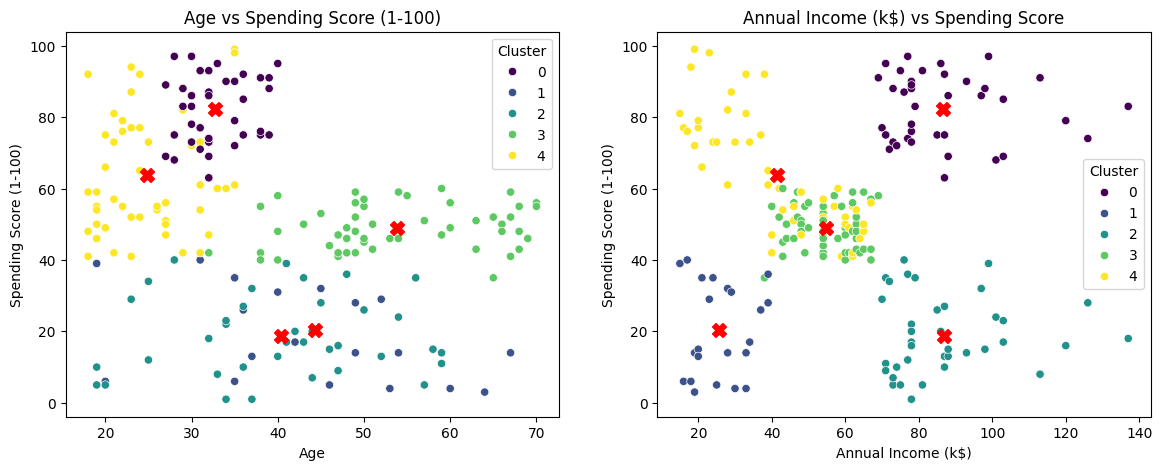

In [20]:
#--------------------------------------------------------------------------------
# PASO 18: ANÁLISIS COMPARATIVO DE LOS CLUSTERS DESDE MÚLTIPLES VISTAS
#--------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos una única figura grande y ancha para que quepan dos gráficos.
plt.figure(figsize=(14, 5))

# --- CREACIÓN DEL PRIMER SUBGRÁFICO (IZQUIERDA) ---

# plt.subplot(1, 2, 1) crea una cuadrícula de 1 fila por 2 columnas y activa el primer gráfico.
# Todas las siguientes líneas de código se dibujarán en este primer espacio.
plt.subplot(1, 2, 1)
# Creamos el scatter plot de los clientes, usando 'Age' y 'Spending Score' como ejes.
# 'hue' colorea los puntos según la columna 'Cluster'.
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=KM5_Clust, palette='viridis')
# Superponemos los centroides. Usamos las columnas 0 (Age) y 2 (Score) de los centroides.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=100, c='red', marker='X')
plt.title('Age vs Spending Score (1-100)')

# --- CREACIÓN DEL SEGUNDO SUBGRÁFICO (DERECHA) ---

# plt.subplot(1, 2, 2) activa el segundo espacio en nuestra cuadrícula de 1x2.
plt.subplot(1, 2, 2)
# Creamos el segundo scatter plot, esta vez usando 'Annual Income' y 'Spending Score'.
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=KM5_Clust, palette='viridis')
# Superponemos los centroides. Usamos las columnas 1 (Income) y 2 (Score).
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='red', marker='X')
plt.title('Annual Income (k$) vs Spending Score')

# Mostramos la figura completa con ambos subgráficos.
plt.show()

**Conclusiones de los Clusters Encontrados por K-Means:**


Relación entre las variables `Age` y `Spending Score (1-100)`:

Se observa que no hay clusters claros en la relación entre las variables `Age` y `Spending Score (1-100)`.
Sin embargo, se puede observar que los clientes más jóvenes (20-40 años) tienden a tener una puntuación de gasto más alta, cluster 3 y 4.

Relación entre las variables `Annual Income (k$)` y `Spending Score (1-100)`:

- Cluster 0: Clientes con ingresos bajos y puntuación de gasto baja.
- Cluster 1: Clientes con ingresos medios y puntuación de gasto media.
- Cluster 2: Clientes con ingresos bajos y puntuación de gasto alta.
- Cluster 3: Clientes con ingresos altos y puntuación de gasto alta.
- Cluster 4: Clientes con ingresos altos y puntuación de gasto baja.



In [21]:
#--------------------------------------------------------------------------------
# PASO 19: ANÁLISIS CUANTITATIVO DE LOS CLUSTERS
#--------------------------------------------------------------------------------

# Seleccionamos la columna 'Cluster' de nuestro DataFrame KM5_Clust.
# Esta columna contiene la etiqueta del cluster (0, 1, 2, 3, o 4) para cada cliente.
# Luego, aplicamos el método .value_counts().
# Este método cuenta cuántas veces aparece cada número de cluster y devuelve
# una nueva Serie de pandas con los clusters como índice y sus tamaños como valores,
# ordenada de mayor a menor.
cluster_sizes = KM5_Clust['Cluster'].value_counts()

# Imprimimos el resultado para ver el tamaño de cada segmento.
print("Tamaño de cada cluster:")
print(cluster_sizes)

Tamaño de cada cluster:
Cluster
3    51
4    50
0    39
2    38
1    22
Name: count, dtype: int64


In [22]:
#--------------------------------------------------------------------------------
# PASO 20: VISUALIZACIÓN INTERACTIVA DE CLUSTERS EN 3D
#--------------------------------------------------------------------------------

# Importamos la biblioteca Plotly Express, que es una interfaz de alto nivel
# para crear gráficos complejos e interactivos de forma muy sencilla. La abreviamos como px.
import plotly.express as px

# Creamos la figura del gráfico de dispersión 3D con una sola función.
# - El primer argumento es el DataFrame que contiene los datos (KM5_Clust).
# - x, y, z: Asignamos cada una de nuestras tres características numéricas a un eje del espacio 3D.
# - color='Cluster': Este es el parámetro clave. Le dice a Plotly que coloree cada
#                    punto de datos según el valor de la columna 'Cluster'.
#                    Automáticamente asignará un color a cada segmento y creará una leyenda.
fig = px.scatter_3d(KM5_Clust, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster')


# Con .update_layout() podemos personalizar aspectos del gráfico, como añadir un título principal.
fig.update_layout(title='KMeans Clusters en 3D: Segmentación de Clientes')

# El método .show() renderiza y muestra el gráfico interactivo en la salida del notebook.
fig.show()

### Métricas de Evaluación K-Means

- **Coeficiente de silueta**: Esta métrica evalúa cuán cerca están los puntos en un cluster a los puntos en los clusters vecinos. Los valores van de -1 a 1, donde un valor alto indica que los puntos están bien agrupados.

- **Índice de Davies-Bouldin**: Esta métrica evalúa la media de las similitudes entre cada cluster con su cluster más similar, donde la similitud es la relación entre las distancias dentro del cluster y las distancias entre los clusters. Los valores más bajos indican una mejor partición. Tiene un rango de 0 a infinito.

In [23]:
#--------------------------------------------------------------------------------
# PASO 21: EVALUACIÓN CUANTITATIVA DEL MODELO DE CLUSTERING
#--------------------------------------------------------------------------------

from sklearn import metrics

# --- 1. CÁLCULO DEL COEFICIENTE DE SILUETA ---

# Piense en esto como el "Puntaje de Confianza" de nuestro clustering.
silhouette_score = metrics.silhouette_score(X_data, kmeans_labels)
print(f'Coeficiente de Silueta (Puntaje de Confianza): {round(silhouette_score, 3)}')


# --- 2. CÁLCULO DEL ÍNDICE DE DAVIES-BOULDIN ---

# Piense en esto como el "Puntaje de Confusión" entre clusters.
davies_bouldin_score = metrics.davies_bouldin_score(X_data, kmeans_labels)
print(f'Índice de Davies-Bouldin (Puntaje de Confusión): {round(davies_bouldin_score, 3)}')

Coeficiente de Silueta (Puntaje de Confianza): 0.426
Índice de Davies-Bouldin (Puntaje de Confusión): 0.868


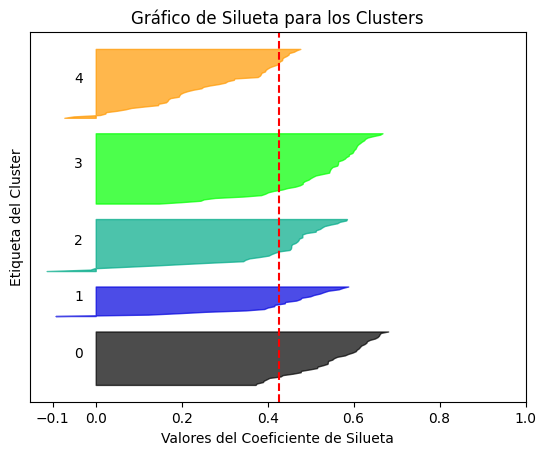

In [24]:
#--------------------------------------------------------------------------------
# PASO 22: DIAGNÓSTICO DETALLADO CON EL GRÁFICO DE SILUETA
#--------------------------------------------------------------------------------

from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt # Necesario

# --- 1. CALCULAR EL PUNTAJE DE SILUETA PARA CADA MUESTRA ---

# A diferencia de `silhouette_score` (que da el promedio), `silhouette_samples`
# devuelve un array con el puntaje de silueta para cada punto de datos (cada cliente).
silhouette_values = silhouette_samples(X_data, kmeans_labels)

# --- 2. PREPARACIÓN Y BUCLE PARA GRAFICAR CADA CLUSTER ---

fig, ax = plt.subplots(1, 1) # Creamos una figura y un eje para el gráfico
y_lower = 10 # Un espacio inicial en el eje Y para que el primer gráfico no empiece en 0

# Iteramos sobre cada número de cluster (de 0 a 4)
for i in range(kmeans.n_clusters):
    # Seleccionamos solo los puntajes de silueta que pertenecen al cluster actual 'i'
    ith_cluster_silhouette_values = silhouette_values[kmeans_labels == i]
    # Los ordenamos de menor a mayor para dibujar la forma de "cuchillo" correctamente
    ith_cluster_silhouette_values.sort()

    # Calculamos el tamaño y la posición vertical para el gráfico del cluster actual
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Elegimos un color único para cada cluster de una paleta de colores
    color = cm.nipy_spectral(float(i) / kmeans.n_clusters)
    # Dibujamos la "silueta" del cluster. Es un gráfico de barras horizontales
    # para cada punto, donde el ancho es su puntaje de silueta.
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Añadimos el número del cluster como etiqueta al lado de su silueta
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Actualizamos la posición vertical para el siguiente cluster, dejando un espacio.
    y_lower = y_upper + 10

# --- 3. AJUSTES FINALES DEL GRÁFICO ---

ax.set_title("Gráfico de Silueta para los Clusters")
ax.set_xlabel("Valores del Coeficiente de Silueta")
ax.set_ylabel("Etiqueta del Cluster")

# ¡Línea clave! Dibujamos una línea roja vertical en el puntaje de silueta PROMEDIO.
# Sirve como referencia para ver qué clusters están por encima o por debajo del promedio.
ax.axvline(x=silhouette_score, color="red", linestyle="--")

ax.set_yticks([]) # Ocultamos los valores del eje Y, que solo sirven para separar los clusters
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # Definimos marcas claras en el eje X

plt.show()

**Conclusiones de las Métricas de Evaluación:**

**Coeficiente de Silueta**: Es una métrica que mide qué tan bien agrupado está un objeto dentro de su propio cluster comparado con otros clusters. Valores cercanos a 1 indican una buena agrupación, mientras que valores cercanos a 0 sugieren solapamiento con otros clusters. Valores negativos implican que el objeto podría estar mal asignado.

**Longitud de las Barras:**

- Barras Largas: Un coeficiente de silueta alto (barras largas) indica que los puntos dentro del cluster están bien agrupados y claramente separados de otros clusters.
- Barras Cortas: Un coeficiente bajo (barras cortas) muestra que los puntos no se diferencian bien entre su propio cluster y otros, sugiriendo posibles problemas de agrupamiento.

**Interpretación del Gráfico:**

- Si la mayoría de los valores de silueta son positivos y altos, los clusters están bien definidos y separados.
- Clusters Desiguales: Si algunos clusters tienen barras más cortas en promedio o valores negativos, puede indicar solapamiento o mala definición de esos clusters.
- Tamaño Relativo de Clusters: También se puede observar la cantidad de elementos en cada cluster (representado por el ancho del área de color), lo que puede dar información sobre el equilibrio del agrupamiento.
  
**Observaciones de la Figura:**
- Los clusters 3 y 1 parecen tener barras largas, lo que indica buena cohesión interna y separación clara de otros clusters.
- Los clusters con barras más cortas podrían tener datos que no se agrupan tan bien, o podrían estar más cerca de otros clusters, lo que indica menos cohesión.
- La línea roja indica el promedio general del coeficiente de silueta para todos los clusters. Valores por encima de esta línea muestran un agrupamiento por encima del promedio, mientras que valores por debajo pueden sugerir problemas.

### 4.2 DBSCAN

Dado que el algoritmo DBSCAN no requiere definir el número de clusters, se evaluarán diferentes valores para los parámetros `eps` y `min_samples` para encontrar la combinación que mejor segmente a los clientes.

**Observaciones**:

Para definir los rangos a explorar para los parámetros `eps` y `min_samples`, se puede utilizar la gráfica de distancias al vecino más cercano. Esta gráfica muestra la distancia al vecino más cercano de cada punto, ordenados de forma ascendente.

La gráfica de distancias al vecino más cercano ayuda a seleccionar el parámetro `eps` en DBSCAN. Por ejemplo, en el siguiente grafico, el "codo" o cambio en la pendiente ocurre aproximadamente entre 10 y 20 en el eje y. Este punto sugiere que un valor adecuado para `eps` podría estar en ese rango.

El parámetro `min_samples` en DBSCAN define el número mínimo de puntos necesarios para considerar una región como un cluster. Generalmente, su valor depende de la estructura esperada de los datos:

1. **Valores bajos (e.g., 3-5)**: Son útiles si se esperan clusters pequeños y densos, ya que requieren menos puntos cercanos para formar un cluster.
2. **Valores moderados (e.g., 5-10)**: Funcionan bien en datasets donde los clusters tienen un tamaño moderado y se desea evitar que puntos aislados formen clusters.
3. **Valores altos**: Se utilizan en datos muy densos y con grandes clusters, donde se necesita una gran cantidad de puntos para definir un cluster.

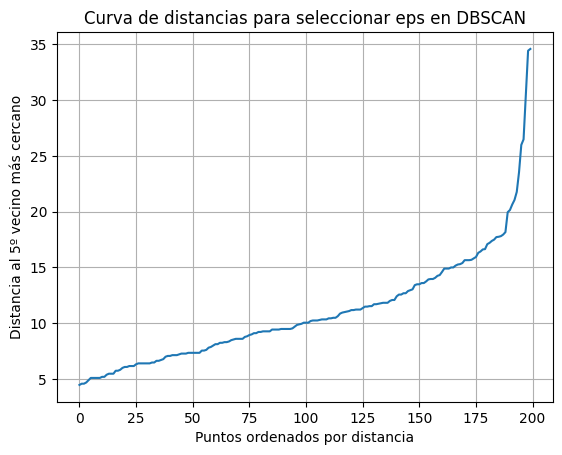

In [25]:
#--------------------------------------------------------------------------------
# PASO 23: ESTIMACIÓN DEL PARÁMETRO EPS PARA DBSCAN
#--------------------------------------------------------------------------------

from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# --- 1. CÁLCULO DE LA DISTANCIA A LOS VECINOS MÁS CERCANOS ---

# Usamos NearestNeighbors, una herramienta para encontrar los vecinos más cercanos de cada punto.
# No es un algoritmo de clustering, sino un paso de pre-análisis.
# - n_neighbors=5: Le decimos que encuentre los 5 vecinos más cercanos para cada punto.
#   La regla general es que este valor (k) sea el mismo que usarás para el parámetro `min_samples` de DBSCAN.
#   Una buena elección para `min_samples` suele ser 2 * número_de_dimensiones (en nuestro caso 2*3=6, así que 5 es razonable).
neighbors = NearestNeighbors(n_neighbors=5)
# "Entrenamos" el modelo, que en realidad solo organiza los datos en una estructura eficiente para búsquedas rápidas.
neighbors_fit = neighbors.fit(X_data)
# Buscamos los k-vecinos para todos los puntos en X_data.
# Devuelve las distancias y los índices de esos vecinos.
distances, indices = neighbors_fit.kneighbors(X_data)

# --- 2. PREPARACIÓN DE LAS DISTANCIAS PARA LA VISUALIZACIÓN ---

# De la matriz de distancias, nos interesa solo la distancia al 5º vecino más cercano (índice 4,
# ya que el 1er vecino en el índice 0 es el propio punto con distancia 0).
# Luego, ordenamos estas distancias de menor a mayor. Esto es crucial para poder ver la curva.
distances = np.sort(distances[:, 4], axis=0)

# --- 3. VISUALIZACIÓN DE LA CURVA DE DISTANCIAS ---

# Graficamos las distancias ordenadas. El eje X es simplemente el índice de los puntos (de 0 a 199)
# y el eje Y es la distancia ordenada.
plt.plot(distances)
plt.title("Curva de distancias para seleccionar eps en DBSCAN")
plt.xlabel("Puntos ordenados por distancia")
plt.ylabel("Distancia al 5º vecino más cercano")
plt.grid()
plt.show()


In [26]:
#--------------------------------------------------------------------------------
# PASO 24: PREPARACIÓN PARA LA BÚSQUEDA DE HIPERPARÁMETROS DE DBSCAN
#--------------------------------------------------------------------------------

from sklearn.cluster import DBSCAN
# `product` es una herramienta muy eficiente de la biblioteca estándar de Python
# que se usa para crear el producto cartesiano de varias listas.
from itertools import product
import numpy as np # Necesario para np.arange

# --- 1. DEFINICIÓN DEL ESPACIO DE BÚSQUEDA ---

# Creamos un array de NumPy con los posibles valores para 'eps'.
# np.arange(inicio, fin, paso) genera números desde 8 hasta 20 (sin incluirlo),
# con incrementos de 0.25. (8.0, 8.25, 8.5, ...)
eps_values = np.arange(8, 20, 0.25)

# Creamos un array con los posibles valores para 'min_samples'.
# En este caso, probaremos con los enteros del 3 al 9.
min_samples_values = np.arange(3, 10)


# --- 2. CREACIÓN DE TODAS LAS COMBINACIONES POSIBLES ---

# Aquí está la magia. `product` toma las dos listas de valores y genera
# un iterador con todos los pares posibles (eps, min_samples).
# Por ejemplo: (8.0, 3), (8.0, 4), ..., (8.0, 9), luego (8.25, 3), (8.25, 4), ... y así sucesivamente.
# `list()` convierte este iterador en una lista completa de tuplas.
DBSCAN_params = list(product(eps_values, min_samples_values))

# (Opcional) Puedes imprimir la cantidad total de combinaciones que se probarán:
# print(f'Se probarán {len(DBSCAN_params)} combinaciones de parámetros.')

In [27]:
#--------------------------------------------------------------------------------
# PASO 25: EJECUCIÓN DE LA BÚSQUEDA DE HIPERPARÁMETROS PARA DBSCAN
#--------------------------------------------------------------------------------
from sklearn.metrics import silhouette_score
import numpy as np # Necesario para np.unique

# --- 1. INICIALIZACIÓN DE LISTAS PARA GUARDAR RESULTADOS ---

# Lista para guardar el número de clusters encontrados en cada experimento.
no_of_clusters = []
# Lista para guardar el puntaje de silueta de cada experimento.
sil_score = []


# --- 2. BUCLE PRINCIPAL DE EXPERIMENTACIÓN ---

# Iteramos sobre cada tupla de parámetros (eps, min_samples) en nuestra lista `DBSCAN_params`.
for p in DBSCAN_params:
    # Creamos y entrenamos una instancia de DBSCAN con los parámetros actuales.
    # p[0] es el valor de 'eps' y p[1] es el valor de 'min_samples'.
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_data)

    # Obtenemos las etiquetas asignadas. En DBSCAN, -1 es una etiqueta especial para el "ruido" (outliers).
    labels = DBS_clustering.labels_

    # Calculamos el número de clusters reales.
    # 1. `np.unique(labels)` obtiene todas las etiquetas únicas (ej: [-1, 0, 1, 2]).
    # 2. `len()` cuenta cuántas son (ej: 4).
    # 3. La condición `(1 if -1 in labels else 0)` resta 1 si la etiqueta de ruido '-1' está presente.
    #    Esto nos da el conteo de clusters sin contar a los outliers como un cluster.
    num_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)
    no_of_clusters.append(num_clusters)

    # El puntaje de silueta solo se puede calcular si hay al menos 2 clusters.
    # Este 'if' es una protección para evitar errores.
    if num_clusters > 1:
        # Si hay más de un cluster, calculamos el puntaje y lo añadimos a la lista.
        score = silhouette_score(X_data, labels)
        sil_score.append(score)
    else:
        # Si se encuentra 1 o 0 clusters, el puntaje no está definido.
        # Añadimos 'NaN' (Not a Number) como un marcador de posición.
        sil_score.append(float('nan'))

**Interpretación de la Figura:**

Los parámetros `eps` y `min_samples` son críticos para el rendimiento de DBSCAN. `eps` define la distancia máxima entre dos muestras para que una sea considerada en el vecindario de la otra, y `min_samples` establece el número mínimo de muestras en un vecindario para que un punto sea considerado un punto central.

La siguiente figura es un mapa de calor (heatmap) que muestra la relación entre los parámetros de DBSCAN (Eps y Min_samples) y el número de clusters resultantes.


**Colores del Mapa de Calor:**

- Los colores indican el número de clusters encontrados para cada combinación de valores de Eps y Min_samples.
- Los colores más claros (en una escala de azul a verde, según el cmap YlGnBu) representan mayor número de clusters, mientras que los colores más oscuros representan menos clusters.
- Los valores anotados en cada celda indican el número exacto de clusters resultantes de cada combinación de parámetros.

**Conclusiones Potenciales:**

- El mapa de calor permite observar cómo diferentes combinaciones de Eps y Min_samples afectan el número de clusters. Por ejemplo:
  - Bajo Eps y bajo Min_samples pueden dar lugar a más clusters, lo que sugiere que el algoritmo está identificando muchos grupos pequeños.
  - Alto Eps y alto Min_samples pueden reducir el número de clusters, ya que se requiere más densidad para formar un cluster y el radio de alcance es amplio.
- Esto puede ayudar a elegir la combinación óptima de parámetros para DBSCAN, donde el número de clusters es razonable para el análisis deseado.

**Uso de esta Visualización:**

- Optimización de Parámetros: El heatmap permite explorar cómo los cambios en Eps y Min_samples afectan el número de clusters sin tener que probar cada combinación individualmente. Esto facilita encontrar la configuración adecuada para el agrupamiento.
- Comprensión de la Sensibilidad: Puedes ver qué parámetros son más sensibles, identificando cómo pequeños cambios en Eps o Min_samples alteran el resultado.

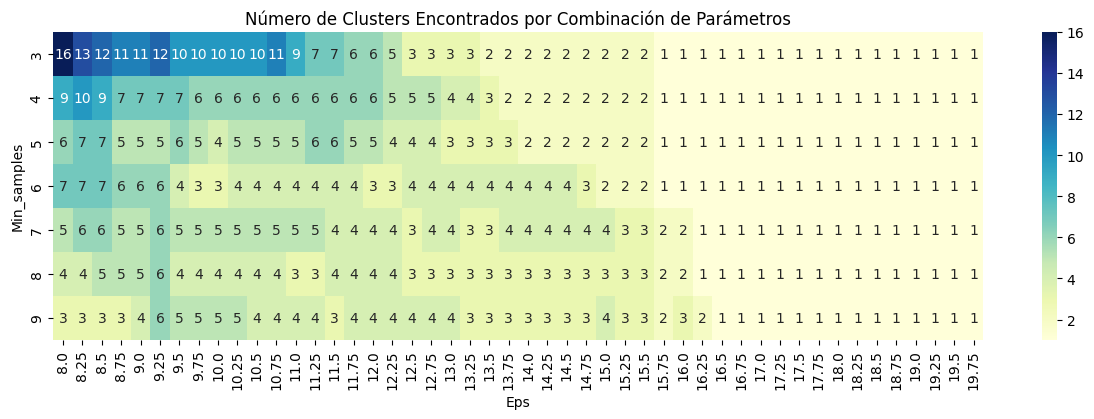

In [28]:
#--------------------------------------------------------------------------------
# PASO 26: VISUALIZACIÓN DE LOS RESULTADOS DE LA BÚSQUEDA EN PARRILLA (PARTE 1)
#--------------------------------------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. ORGANIZACIÓN DE LOS RESULTADOS EN UN DATAFRAME ---

# Creamos un DataFrame a partir de nuestra lista de tuplas de parámetros.
# Cada tupla (eps, min_samples) se convierte en una fila.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
# Añadimos una nueva columna con el número de clusters encontrados en cada experimento.
# Esta lista ('no_of_clusters') está alineada con 'DBSCAN_params'.
tmp['No_of_clusters'] = no_of_clusters


# --- 2. REESTRUCTURACIÓN DE LOS DATOS CON UNA TABLA PIVOTE ---

# `pivot_table` es una herramienta muy potente para remodelar DataFrames.
# La usamos para crear una matriz perfecta para nuestro mapa de calor:
# - `values='No_of_clusters'`: Los valores dentro de la matriz serán el número de clusters.
# - `index='Min_samples'`: Las filas de nuestra matriz corresponderán a cada valor de `Min_samples`.
# - `columns='Eps'`: Las columnas de nuestra matriz corresponderán a cada valor de `Eps`.
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')


# --- 3. CREACIÓN DEL MAPA DE CALOR (HEATMAP) ---

# Creamos una figura con un tamaño adecuado.
fig, ax = plt.subplots(figsize=(15,4))
# Usamos `sns.heatmap` para visualizar nuestra tabla pivote.
# - `annot=True`: Muestra el valor numérico en cada celda del mapa.
# - `annot_kws`: Personaliza el tamaño de la fuente de las anotaciones para que sea legible.
# - `cmap="YlGnBu"`: Define la paleta de colores (Amarillo-Verde-Azul).
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
ax.set_title('Número de Clusters Encontrados por Combinación de Parámetros')
plt.show()

El gráfico de calor anterior muestra que el número de clusters varía entre 17 y 4. Sin embargo, la mayoría de las combinaciones ofrecen entre 4 y 7 clusters. Para decidir qué combinación elegir, se utilizará la metrica de evaluación `Silhouette Score`.

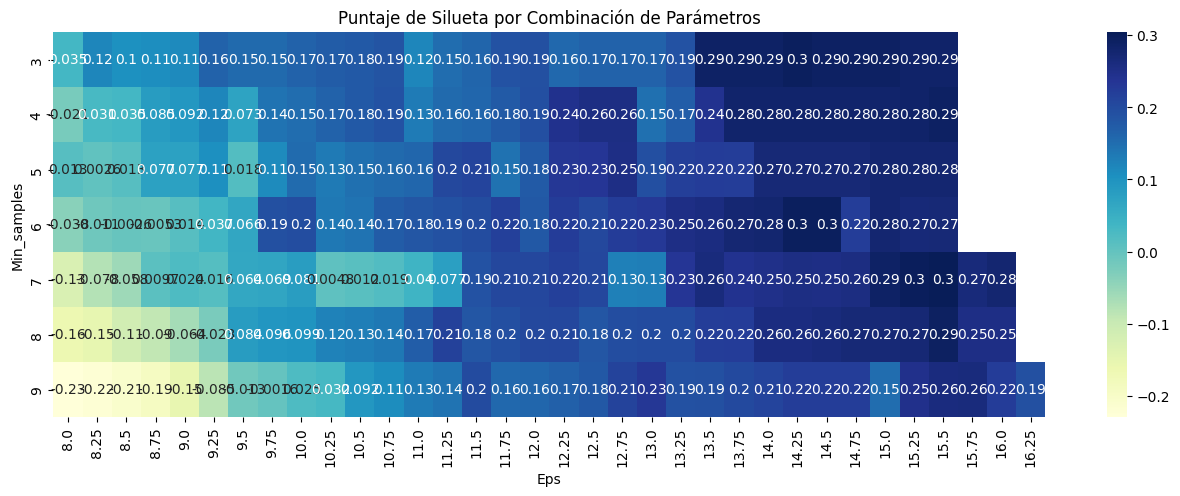

In [29]:
#--------------------------------------------------------------------------------
# PASO 27: VISUALIZACIÓN DE LOS RESULTADOS DE LA BÚSQUEDA EN PARRILLA (PARTE 2)
#--------------------------------------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. ORGANIZACIÓN DE LOS RESULTADOS EN UN DATAFRAME ---

# Creamos el mismo DataFrame base con las combinaciones de parámetros.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
# ¡La diferencia clave está aquí! Añadimos la columna con los puntajes de silueta.
tmp['Sil_score'] = sil_score


# --- 2. REESTRUCTURACIÓN DE LOS DATOS CON UNA TABLA PIVOTE ---

# Volvemos a usar la tabla pivote para crear nuestra matriz 2D.
# - values='Sil_score': Ahora, los valores dentro de la matriz serán los puntajes de silueta.
# - index='Min_samples' y columns='Eps' definen las filas y columnas igual que antes.
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')


# --- 3. CREACIÓN DEL MAPA DE CALOR (HEATMAP) ---

# Creamos una figura con un tamaño adecuado.
fig, ax = plt.subplots(figsize=(16,5))
# Creamos el mapa de calor a partir de la nueva tabla pivote de puntajes de silueta.
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.title('Puntaje de Silueta por Combinación de Parámetros')
plt.show()

In [30]:
#--------------------------------------------------------------------------------
# PASO 28: EXTRACCIÓN AUTOMÁTICA DE LOS PARÁMETROS ÓPTIMOS
#--------------------------------------------------------------------------------

# Asumiendo que 'pivot_1' es el DataFrame de la celda anterior,
# con 'Min_samples' como filas, 'Eps' como columnas y 'Sil_score' como valores.

# --- 1. Encontrar el valor máximo del puntaje de silueta ---
# Esta es una operación encadenada:
# - `pivot_1.max()`: Primero, calcula el valor máximo para CADA columna (cada valor de Eps).
#   Esto devuelve una Serie con el mejor puntaje para cada Eps.
# - `.max()`: Sobre esa Serie de máximos, vuelve a calcular el máximo, lo que nos da
#   el valor más alto de toda la tabla.
max_sil_score = pivot_1.max().max()
print(f'Máximo Coeficiente de Silueta: {round(max_sil_score, 3)}')


# --- 2. Encontrar el valor óptimo de 'eps' ---
# El proceso es similar:
# - `pivot_1.max()`: Obtenemos la misma Serie con el mejor puntaje para cada Eps.
# - `.idxmax()`: En lugar de devolver el valor, `.idxmax()` devuelve el ÍNDICE (la etiqueta)
#   del valor máximo. Como las etiquetas de esta Serie son los valores de Eps,
#   esto nos da el Eps óptimo.
print(f'Parámetro Óptimo eps: {pivot_1.max().idxmax()}')


# --- 3. Encontrar el valor óptimo de 'Min Samples' ---
# Esta es la línea más ingeniosa:
# - `pivot_1.idxmax()`: Esta operación, aplicada al DataFrame completo, devuelve una Serie
#   que nos dice, para cada columna (Eps), cuál es la FILA (Min_samples) que tuvo el valor más alto.
# - `[pivot_1.max().idxmax()]`: Usamos el Eps óptimo que encontramos en el paso anterior
#   para hacer una búsqueda en esta Serie. En resumen, le preguntamos: "Para el mejor Eps,
#   ¿cuál fue el mejor Min_samples?".
print(f'Parámetro Óptimo Min Samples: {pivot_1.idxmax()[pivot_1.max().idxmax()]}')

Máximo Coeficiente de Silueta: 0.304
Parámetro Óptimo eps: 15.5
Parámetro Óptimo Min Samples: 7


In [31]:
#--------------------------------------------------------------------------------
# PASO 29: ENTRENAMIENTO DEL MODELO DBSCAN FINAL Y ASIGNACIÓN DE CLUSTERS
#--------------------------------------------------------------------------------

from sklearn.cluster import DBSCAN
import numpy as np # Necesario para np.unique

# --- 1. INICIALIZACIÓN Y ENTRENAMIENTO DEL MODELO FINAL ---

# Asumiendo que 'X_data' son tus datos
# Creamos la instancia final del modelo DBSCAN, usando los parámetros óptimos
# que encontramos en nuestra búsqueda en parrilla.
dbscan = DBSCAN(eps=15.5, min_samples=7)

# Usamos el método .fit_predict(), que es un atajo conveniente que hace dos cosas:
# 1. .fit(X_data): Entrena el modelo, identificando regiones densas (clusters) y puntos aislados (ruido).
# 2. .predict(X_data): Devuelve las etiquetas de cluster para los datos con los que fue entrenado.
# El resultado es un array con las etiquetas asignadas a cada cliente.
dbscan_labels = dbscan.fit_predict(X_data)


# --- 2. INTEGRACIÓN DE LOS RESULTADOS EN UN NUEVO DATAFRAME ---

# Creamos una copia de nuestros datos para no modificar el original.
DBSCAN_Clust = X_data.copy()

# Creamos una nueva columna 'Cluster' y le asignamos las etiquetas generadas por DBSCAN.
# Ahora cada cliente tiene su segmento asignado (ej. 0, 1, 2...) o está marcado como ruido (-1).
DBSCAN_Clust['Cluster'] = dbscan_labels


# --- 3. REPORTE DEL RESULTADO ---

# Calculamos e imprimimos el número de etiquetas únicas que el modelo ha generado.
# ¡Nota importante! Este conteo INCLUYE la etiqueta de ruido (-1) si es que se encontraron outliers.
# Por lo tanto, si el resultado es "5", podría significar 4 clusters y 1 grupo de ruido.
num_labels_found = len(np.unique(dbscan_labels))
print(f'Número de etiquetas únicas encontradas (incluyendo ruido): {num_labels_found}')

# Para un conteo más preciso de solo los clusters:
num_clusters_found = num_labels_found - (1 if -1 in dbscan_labels else 0)
print(f'Número de clusters reales encontrados: {num_clusters_found}')

Número de etiquetas únicas encontradas (incluyendo ruido): 4
Número de clusters reales encontrados: 3


In [32]:
#--------------------------------------------------------------------------------
# PASO 30: ANÁLISIS CUANTITATIVO DE LOS CLUSTERS DE DBSCAN
#--------------------------------------------------------------------------------

# Seleccionamos la columna 'Cluster' de nuestro DataFrame con los resultados de DBSCAN.
# Esta columna contiene la etiqueta del cluster (0, 1, 2...) o la etiqueta de ruido (-1) para cada cliente.
# Aplicamos el método .value_counts() para contar cuántas veces aparece cada etiqueta única.
cluster_sizes = DBSCAN_Clust['Cluster'].value_counts()

# Mostramos el resultado. Pandas presentará una Serie con las etiquetas como índice
# y el número de clientes como valor, ordenado de mayor a menor.
cluster_sizes

,count
Cluster,
0,123
1,34
2,27
-1,16


DBSCAN creó 3 clusters y un cluster adicional para los outliers (-1)

### Visualización de los Clusters Encontrados por DBSCAN

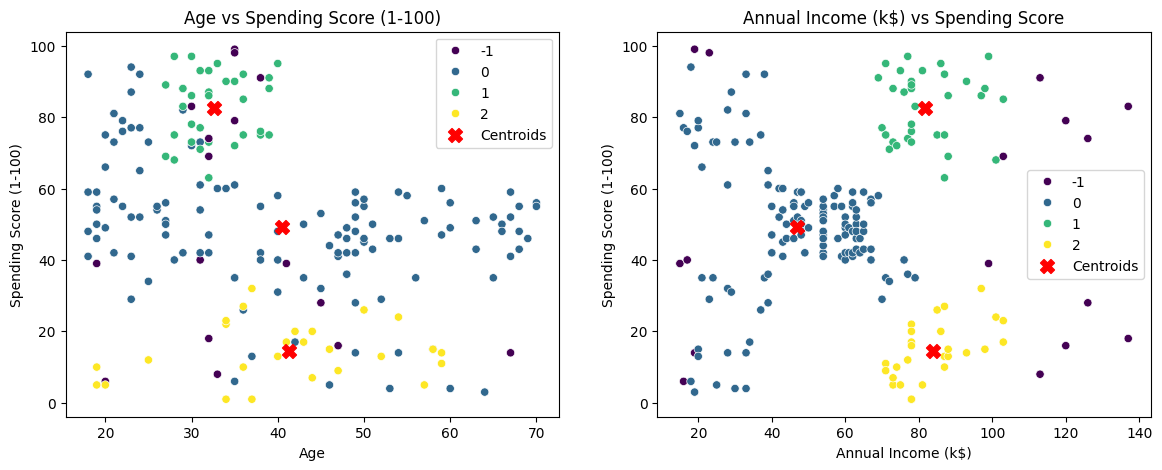

In [33]:
#--------------------------------------------------------------------------------
# PASO 31: VISUALIZACIÓN FINAL DE CLUSTERS Y CENTROIDES DE DBSCAN
#--------------------------------------------------------------------------------

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. FUNCIÓN PARA CALCULAR LOS CENTROIDES DE DBSCAN ---

# Definimos una función que calcula el punto central de cada cluster de DBSCAN.
def get_dbscan_centroids(X_data, dbscan_labels):
    centroids = []
    # Obtenemos las etiquetas únicas de los clusters (incluyendo -1 para el ruido)
    unique_labels = np.unique(dbscan_labels)
    # Iteramos sobre cada etiqueta de cluster
    for label in unique_labels:
        # ¡Paso clave! Ignoramos la etiqueta de ruido (-1)
        if label != -1:
            # Seleccionamos todos los puntos que pertenecen al cluster actual
            cluster_points = X_data[dbscan_labels == label]
            # Calculamos la media de esos puntos a lo largo de cada eje (característica).
            # Esto nos da el centro geométrico del cluster.
            centroid = np.mean(cluster_points, axis=0)
            centroids.append(centroid)
    return centroids

# --- 2. USO DE LA FUNCIÓN Y PREPARACIÓN DE DATOS ---

# Llamamos a nuestra función para obtener la lista de centroides.
centroids = get_dbscan_centroids(X_data, dbscan_labels)

# Convertimos la lista de centroides a un array de NumPy para poder usar slicing fácilmente (ej. [:, 0])
centroids = np.array(centroids)

# --- 3. CREACIÓN DE LA VISUALIZACIÓN COMPARATIVA ---

plt.figure(figsize=(14, 5))

# Gráfico de la Izquierda: Age vs Spending Score
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=DBSCAN_Clust, palette='viridis')
# Graficamos los centroides si se encontró al menos un cluster.
if centroids.size > 0:
    plt.scatter(centroids[:, 0], centroids[:, 2], s=100, c='red', label='Centroids', marker='X')
plt.title('Age vs Spending Score (1-100)')
plt.legend()

# Gráfico de la Derecha: Annual Income vs Spending Score
plt.subplot(1, 2, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=DBSCAN_Clust, palette='viridis')
# Graficamos los centroides si se encontró al menos un cluster.
if centroids.size > 0:
    plt.scatter(centroids[:, 1], centroids[:, 2], s=100, c='red', label='Centroids', marker='X')
plt.title('Annual Income (k$) vs Spending Score')
plt.legend()

plt.show()

### Métricas de Evaluación DBSCAN


In [34]:
#--------------------------------------------------------------------------------
# PASO 32: EVALUACIÓN CUANTITATIVA FINAL DEL MODELO DBSCAN
#--------------------------------------------------------------------------------

from sklearn import metrics

# --- 1. CÁLCULO DEL COEFICIENTE DE SILUETA ---

# Calculamos el puntaje de silueta promedio para la solución de clustering de DBSCAN.
# Recuerda: Un valor más alto es mejor (más cercano a +1).
silhouette_score = metrics.silhouette_score(X_data, dbscan_labels)
print(f'Coeficiente de Silueta para DBSCAN: {round(silhouette_score, 3)}')


# --- 2. CÁLCULO DEL ÍNDICE DE DAVIES-BOULDIN ---

# Calculamos el índice de Davies-Bouldin para la solución de clustering de DBSCAN.
# Recuerda: Un valor más bajo es mejor (más cercano a 0).
davies_bouldin_score = metrics.davies_bouldin_score(X_data, dbscan_labels)
print(f'Índice de Davies-Bouldin para DBSCAN: {round(davies_bouldin_score, 3)}')

Coeficiente de Silueta para DBSCAN: 0.304
Índice de Davies-Bouldin para DBSCAN: 2.278


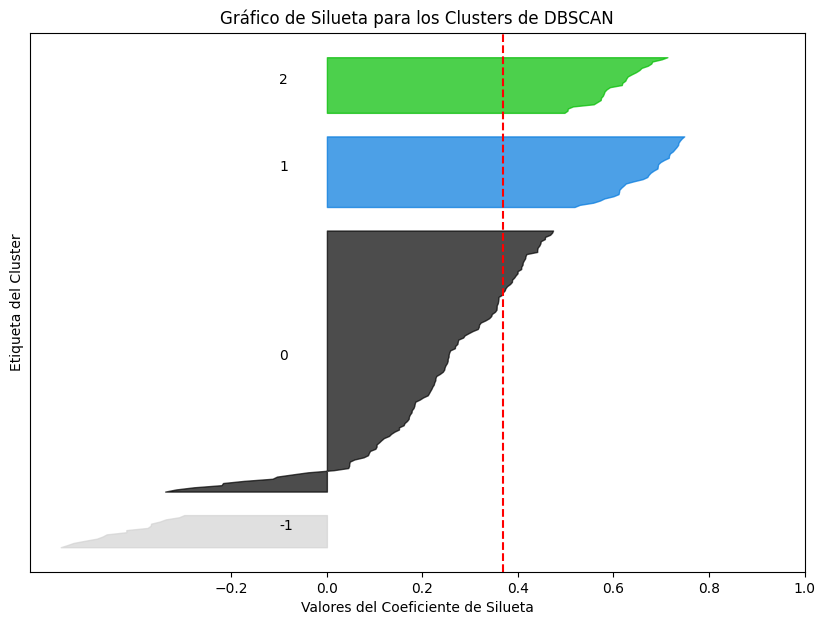

In [35]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

# 1. Calcular el puntaje de silueta para cada muestra
silhouette_values = silhouette_samples(X_data, dbscan_labels)
# Calcular el promedio solo para los puntos que SÍ están en un cluster
# Esto es para nuestra línea roja de referencia
avg_score_for_clustered_points = np.mean(silhouette_values[dbscan_labels != -1])


# 2. Preparación y bucle para graficar cada cluster
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
y_lower = 10
# Bucle corregido: iteramos sobre las etiquetas únicas encontradas
unique_labels = np.unique(dbscan_labels)

for label in unique_labels:
    # Seleccionamos los puntajes de silueta para el cluster (o ruido) actual
    ith_cluster_silhouette_values = silhouette_values[dbscan_labels == label]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Asignamos un color. Haremos que el ruido (-1) sea gris.
    if label == -1:
        color = "lightgrey"
    else:
        color = cm.nipy_spectral(float(label) / len(unique_labels))

    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Etiquetamos la silueta con su número de cluster
    ax.text(-0.1, y_lower + 0.5 * size_cluster_i, str(label))

    y_lower = y_upper + 10

# 3. Ajustes finales del gráfico
ax.set_title("Gráfico de Silueta para los Clusters de DBSCAN")
ax.set_xlabel("Valores del Coeficiente de Silueta")
ax.set_ylabel("Etiqueta del Cluster")

# Dibujamos la línea del puntaje promedio (solo de los puntos clusterizados)
ax.axvline(x=avg_score_for_clustered_points, color="red", linestyle="--")

ax.set_yticks([])
ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

**Conclusiones de los Clusters Encontrados por DBSCAN:**

Tomando como referencia las métricas de evaluación y la visualización de los clusters, se puede concluir que el algoritmo DBSCAN no es el más adecuado para este problema. Esto se debe a que el algoritmo DBSCAN trata de encontrar clusters de densidad alta, y en este caso los clusters no son de densidad alta.

*Interpretación Índice de Davies-Bouldin:*

- Valores bajos del índice indican que los clusters son compactos y bien separados, lo que refleja un buen agrupamiento.
- Valores altos sugieren que los clusters se solapan o están muy dispersos, lo que indica un agrupamiento de menor calidad.

*Interpretación del Coeficiente de Silueta:*

- Valores cercanos a 1 indican una buena agrupación, donde los puntos están bien separados de otros clusters.
- Valores cercanos a 0 sugieren solapamiento con otros clusters.

## 6. Conclusiones

En este notebook, se realizó un estudio comparativo de algunos algoritmos de clustering para la segmentación de clientes de un centro comercial. El objetivo fue encontrar el algoritmo que mejor segmente a los clientes de acuerdo a sus características.

**Los resultados obtenidos fueron los siguientes:**

- **Número de clusters**:
  - K-Means encontró 5 clusters, mientras que DBSCAN identificó 5 clusters y un cluster adicional para los outliers (-1).
- **Coeficiente de Silueta**:
  - K-Means obtuvo un valor de 0.44, indicando clusters más compactos, mientras que DBSCAN logró 0.26, sugiriendo menos cohesión interna.
- **Índice de Davies-Bouldin**:
  - K-Means tuvo un valor de 0.822, lo que refleja clusters más separados y definidos, comparado con 2.237 de DBSCAN, que indica una menor separación entre clusters.
- **Interpretabilidad**:
  - Los clusters generados por K-Means resultaron ser más claros y fáciles de interpretar en comparación con los obtenidos por DBSCAN.